<a href="https://colab.research.google.com/github/Kashif2102/Lok-Sabha-2024-Election-Analysis/blob/main/Lok_Sabha_2024_Election_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
def fetch_election_results(url):
    try:
        page = requests.get(url)
        page.raise_for_status()
    except requests.RequestException as e:
        print(f"Error fetching page: {e}")
        return None
    return BeautifulSoup(page.content, 'html.parser')


In [4]:
def parse_table(soup):
    """Parses the election results table from the BeautifulSoup object."""
    table = soup.find('table', class_='table')
    if not table:
        print("Table not found.")
        return None

    headers = [th.text.strip() for th in table.find('thead').find_all('th')]

    data = []
    for row in table.find('tbody').find_all('tr')[:-1]:
        data.append([td.text.strip() for td in row.find_all('td')])

    return pd.DataFrame(data, columns=headers)


In [5]:
def clean_data(df):
    """Cleans the data frame by converting columns to appropriate types."""
    df['Won'] = pd.to_numeric(df['Won'], errors='coerce')
    df = df.dropna(subset=['Won'])
    return df

In [6]:
def plot_results(df):
    """Plots the election results."""
    df_sorted = df.sort_values(by='Won', ascending=True)

    plt.figure(figsize=(12, 12))
    plt.bar(df_sorted['Party'], df_sorted['Won'], color='skyblue')
    plt.xlabel('Party')
    plt.ylabel('Number of Constituencies Won')
    plt.title('Party vs. Constituencies Won (June 2024 Results)')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [7]:
def summary_statistics(df):
    """Prints summary statistics of the election results."""
    total_won = df['Won'].sum()
    party_counts = df['Party'].value_counts()
    print(f"Total Constituencies Won: {total_won}")
    print("\nNumber of Parties Participated:")
    print(party_counts)

In [8]:
def additional_plots(df):
    """Generates additional plots for deeper insights."""
    plt.figure(figsize=(10, 6))
    df['Party'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Party Distribution')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

                                                Party  Won Leading Total
0                        Bharatiya Janata Party - BJP  240       0   240
1                      Indian National Congress - INC   99       0    99
2                                Samajwadi Party - SP   37       0    37
3                 All India Trinamool Congress - AITC   29       0    29
4                     Dravida Munnetra Kazhagam - DMK   22       0    22
5                                  Telugu Desam - TDP   16       0    16
6                        Janata Dal  (United) - JD(U)   12       0    12
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    9       0     9
8   Nationalist Congress Party – Sharadchandra Paw...    8       0     8
9                                     Shiv Sena - SHS    7       0     7
10             Lok Janshakti Party(Ram Vilas) - LJPRV    5       0     5
11      Yuvajana Sramika Rythu Congress Party - YSRCP    4       0     4
12                         Rashtriya Janata Dal - R

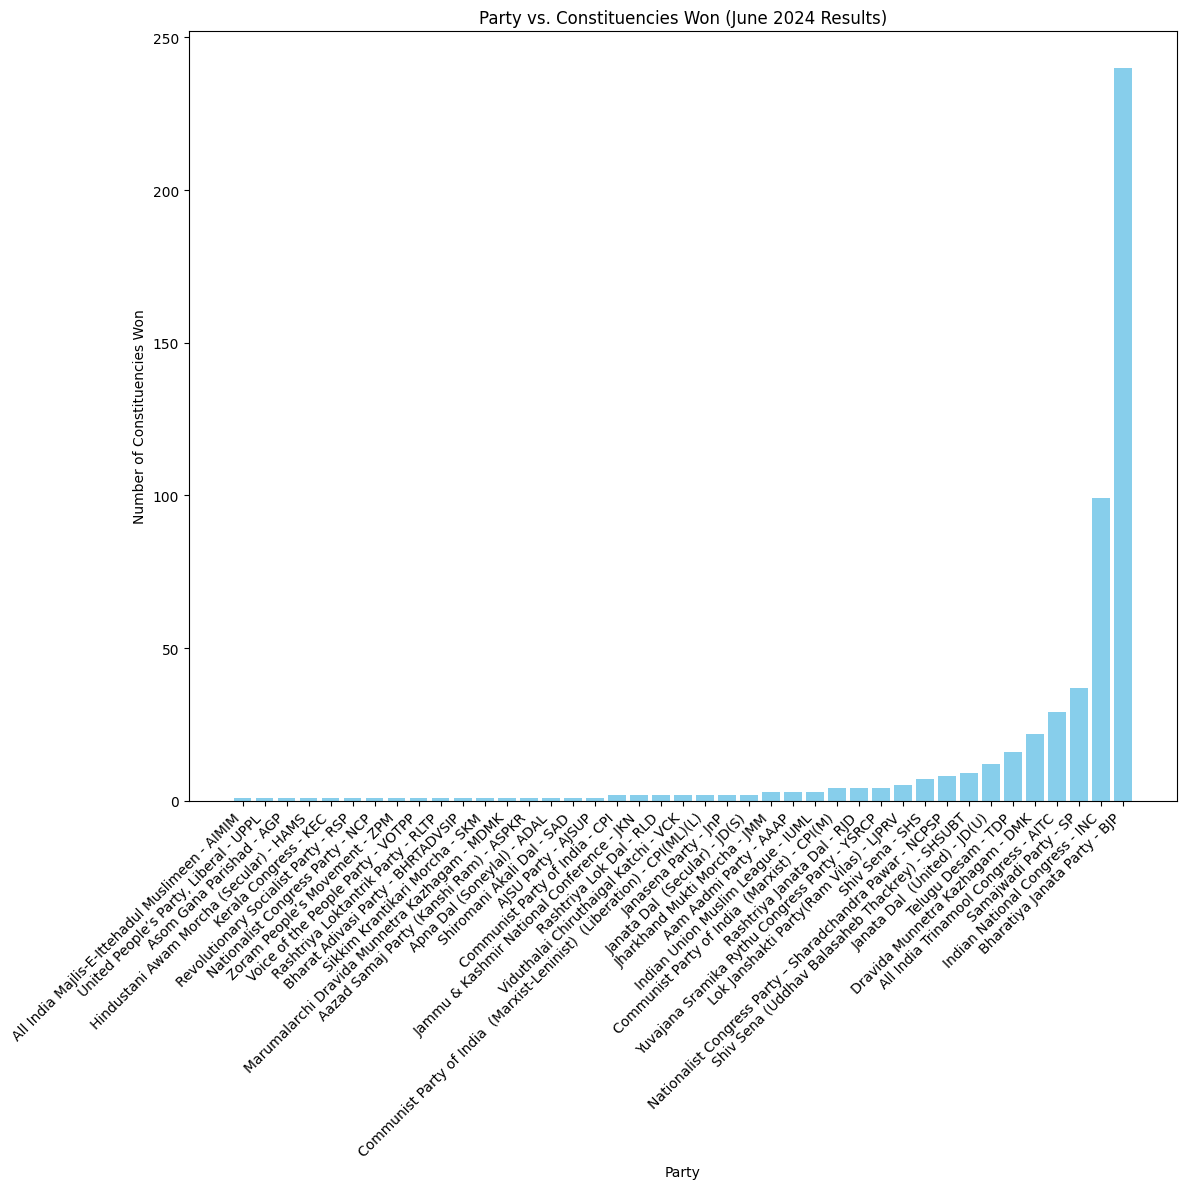

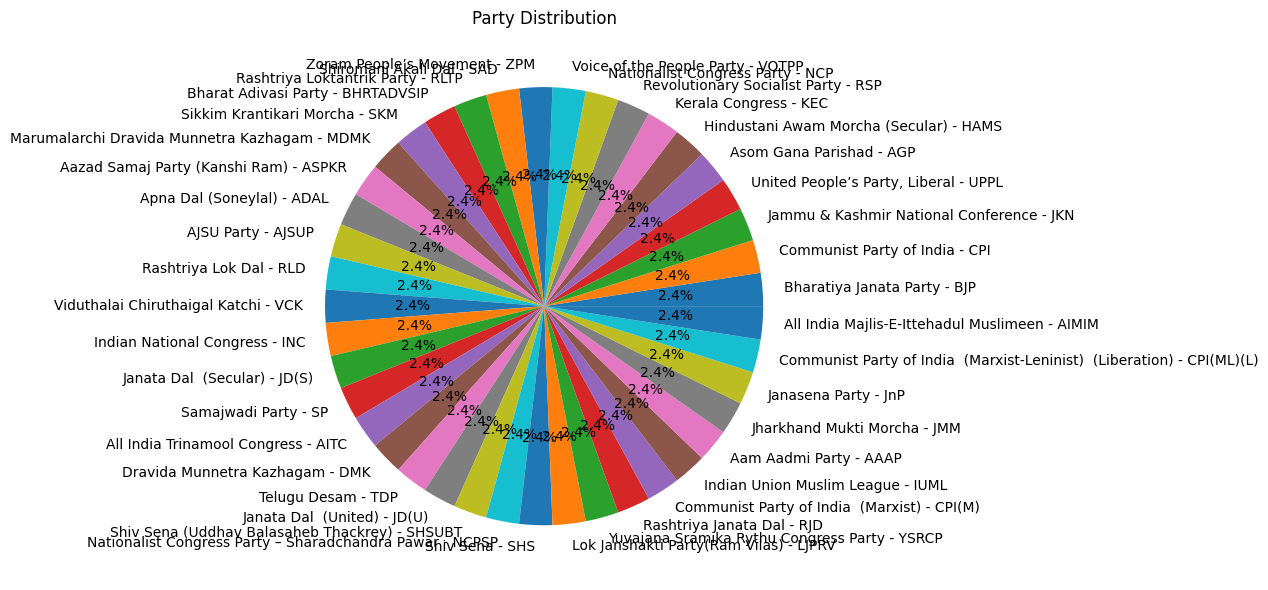

In [9]:
def main():
    url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
    soup = fetch_election_results(url)
    if soup:
        df = parse_table(soup)
        if df is not None:
            df = clean_data(df)
            print(df)
            summary_statistics(df)
            plot_results(df)
            additional_plots(df)

if __name__ == "__main__":
    main()